In [1]:
import requests
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Point

# Function to retrieve OSM way data in JSON format
def get_osm_way_json(way_id):
    overpass_url = "http://overpass-api.de/api/interpreter"
    overpass_query = f"""
    [out:json];
    way({way_id});
    (._;>;);
    out geom;
    """
    response = requests.post(overpass_url, data=overpass_query)
    response.raise_for_status()
    return response.json()

# Extract coordinates from OSM way data
def extract_coordinates(osm_data):
    nodes = {}
    for element in osm_data['elements']:
        if element['type'] == 'node':
            nodes[element['id']] = (element['lon'], element['lat'])
    way = next(element for element in osm_data['elements'] if element['type'] == 'way')
    return [nodes[node_id] for node_id in way['nodes']]

# Retrieve data for Coast Campground and Coast Trail
coast_campground_data = get_osm_way_json(233668396)
coast_trail_data = get_osm_way_json(421882260)

# Extract coordinates
coast_campground_coords = extract_coordinates(coast_campground_data)
coast_trail_coords = extract_coordinates(coast_trail_data)

# Create LineString objects
coast_campground = LineString(coast_campground_coords)
coast_trail = LineString(coast_trail_coords)

# Find intersection
intersection = coast_campground.intersection(coast_trail)



In [4]:

type(intersection)

shapely.geometry.multipoint.MultiPoint

In [13]:
intersection.geoms[0].xy

(array('d', [-122.85465545527882]), array('d', [38.01832528951993]))

In [6]:
import shapely

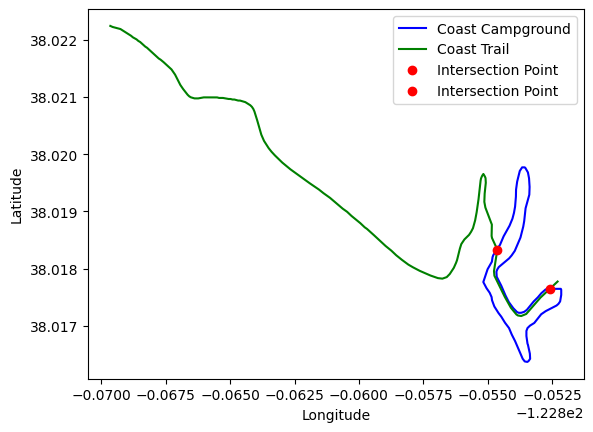

: 

In [14]:
# Plotting
fig, ax = plt.subplots()
x, y = coast_campground.xy
ax.plot(x, y, label='Coast Campground', color='blue')
x, y = coast_trail.xy
ax.plot(x, y, label='Coast Trail', color='green')

# Plot intersection points
if intersection.geom_type == 'Point':
    ax.plot(intersection.x, intersection.y, 'ro', label='Intersection Point')
elif intersection.geom_type == 'MultiPoint':
    for point in intersection.geoms:
        ax.plot(point.x, point.y, 'ro', label='Intersection Point')

# Adding labels and legend
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
plt.show()